In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# 1. 데이터 불러오기 및 정규화
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # CNN 입력을 위해 채널 추가
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [6]:
# 2. 라벨 One-hot 인코딩
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [8]:
# 3. CNN 모델 구성
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 필터 32개, 3x3 커널
    MaxPooling2D((2,2)),                                          # 2x2 풀링
    Conv2D(64, (3,3), activation='relu'),                         # 필터 64개
    MaxPooling2D((2,2)),
    Flatten(),                                                    # 2D -> 1D
    Dense(64, activation='relu'),                                 # 은닉층
    Dropout(0.5),                                                 # 과적합 방지용 Dropout
    Dense(10, activation='softmax')                               # 출력층 (10개 클래스)
])


D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 4. 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# 5. 학습 (EarlyStopping 포함)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7813 - loss: 0.6751 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9577 - loss: 0.1468 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9686 - loss: 0.1066 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9762 - loss: 0.0806 - val_accuracy: 0.9913 - val_loss: 0.0377
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9794 - loss: 0.0683 - val_accuracy: 0.9890 - val_loss: 0.0372
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.9900 - val_loss: 0.0381
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9903 - val_loss: 0.0356
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9842 - loss: 0.0516 - 

In [14]:
# 6. 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n 테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0328

 테스트 정확도: 0.9926


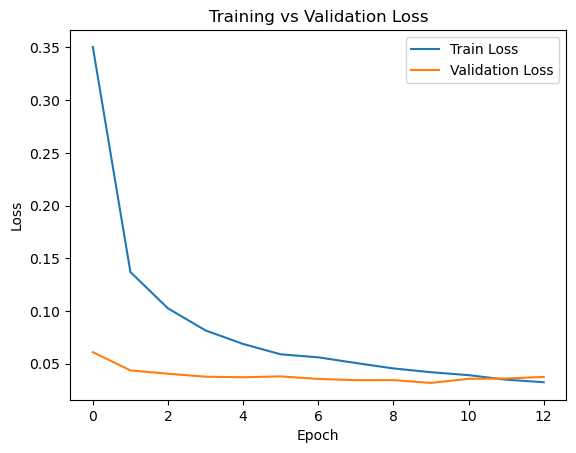

In [18]:
# 7. 학습/검증 손실 시각화
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


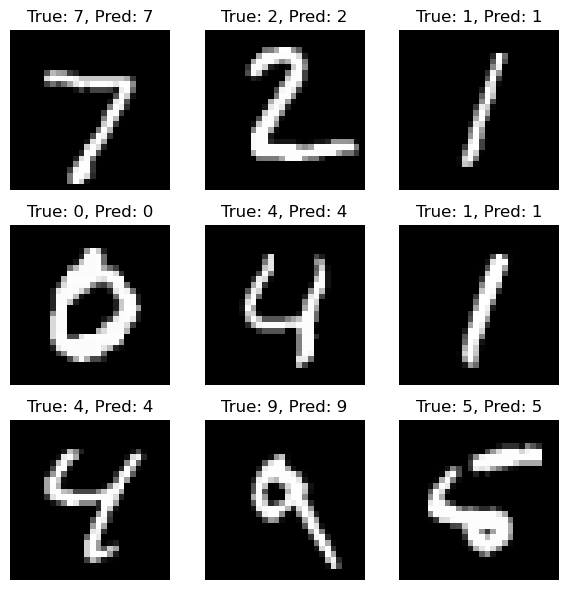

In [20]:
# 8. 예측 이미지 9장 시각화
predictions = model.predict(x_test[:9])

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    true_label = y_test[i]
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


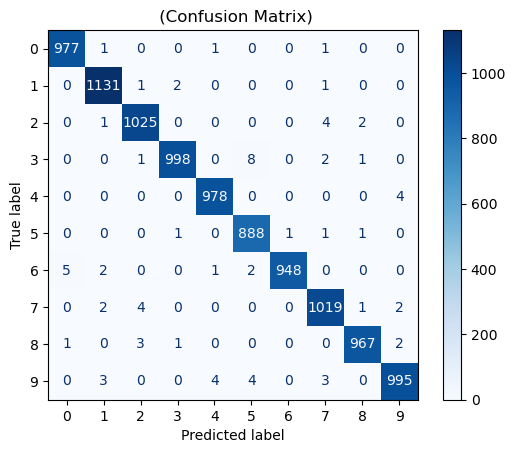

In [24]:
# 9. 혼동 행렬 출력
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title(" (Confusion Matrix)")
plt.show()